In [63]:
# 1. Import libraries and modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 
from sklearn import linear_model
import matplotlib.pyplot as plt
 
# 3. Load red wine data.
#dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
#data = pd.read_csv(dataset_url, sep=';')
 
# 4. Split data into training and test sets
#y = data.quality
#X = data.drop('quality', axis=1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                    test_size=0.2, 
#                                                    random_state=123, 
#                                                    stratify=y)
 
# 5. Declare data preprocessing steps
# 6. Declare hyperparameters to tune
# 7. Tune model using cross-validation pipeline
# 8. Refit on the entire training set
# No additional code needed if clf.refit == True (default is True)
# 9. Evaluate model pipeline on test data
#print r2_score(y_test, pred)
#print mean_squared_error(y_test, pred)
# 10. Save model for future use
# To load: clf2 = joblib.load('rf_regressor.pkl')
#Can you accurately predict insurance costs?

In [64]:
# 2. Load insurance data file
data = pd.read_csv('E:/ML/Insurance.csv')

In [65]:
# 3. find the how much row and columns
data.shape

(1338, 7)

In [66]:
# 4. Find the information about table
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [67]:
# 5. look the top file row in database
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [68]:
# 6. check the is any column is holding null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [69]:
#select the traget variable and features var
#traget variable is CHARGES how much cost for the person

# 7. Split data into training and test sets
y = data.charges
X = data.drop('charges', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123)

In [70]:
#convert the sex vlaues female & male into ('0 and 1')
data.loc[data["sex"]=='male', "sex"]=0
data.loc[data["sex"]=='female', "sex"]=1

In [71]:
data.loc[data["smoker"]=='yes', "smoker"]=1
data.loc[data["smoker"]=='no', "smoker"]=0

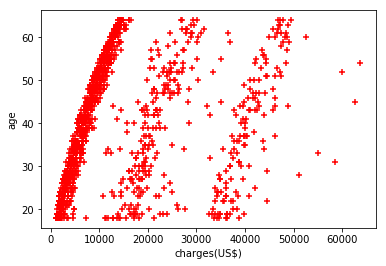

In [121]:
%matplotlib inline
plt.xlabel('charges(US$)')
plt.ylabel('age')
plt.scatter(data.charges,data.age, color='red',marker='+')
plt.show()

In [79]:
reg = linear_model.LinearRegression()
reg.fit(data[['charges']],data.age)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [129]:
reg.predict(30000)

array([45.01064077])

In [130]:
reg.coef_

array([0.00034691])

In [131]:
reg.intercept_

34.603416896331794

In [132]:
#y=m*x+b # m is a coef, x is a predict, b is a predict values
0.00034691*30000+34.603416896331794

45.01071689633179

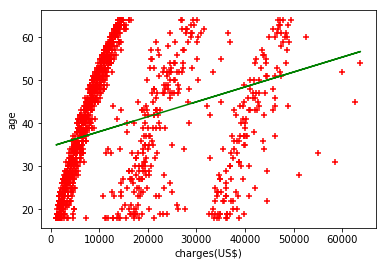

In [133]:
%matplotlib inline
plt.xlabel('charges(US$)')
plt.ylabel('age')
plt.scatter(data.charges,data.age, color='red',marker='+')
plt.plot(data.charges,reg.predict(data[['charges']]), color='green')

In [118]:
#read the insurance file
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
5,31,1,25.740,0,0,southeast,3756.62160
6,46,1,33.440,1,0,southeast,8240.58960
7,37,1,27.740,3,0,northwest,7281.50560
8,37,0,29.830,2,0,northeast,6406.41070
9,60,1,25.840,0,0,northwest,28923.13692


In [105]:
#example for the area of prices
df = pd.read_csv('E:/OUTOKUMPU/ML/Area.csv')

In [106]:
df.head(3)

,Area
0,1000
1,2000
2,3500


In [107]:
reg.predict(df)

array([34.95032436, 35.29723182, 35.81759302, 35.99104675, 36.51140794,
       36.68486167, 37.20522287, 37.3786766 , 37.89903779, 38.07249152])

In [108]:
p = reg.predict(df)

In [109]:
p

array([34.95032436, 35.29723182, 35.81759302, 35.99104675, 36.51140794,
       36.68486167, 37.20522287, 37.3786766 , 37.89903779, 38.07249152])

In [114]:
df['prces'] = p

In [116]:
df

,Area,prces
0,1000,34.950324
1,2000,35.297232
2,3500,35.817593
3,4000,35.991047
4,5500,36.511408
5,6000,36.684862
6,7500,37.205223
7,8000,37.378677
8,9500,37.899038
9,10000,38.072492


In [117]:
df.to_csv("prediction.csv", index=False)